In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_json(r'Project\art_crawl\article\article\spiders\author_use.json')
df.columns

Index(['title', 'abstract', 'author', 'ins', 'author_num', 'date', 'keywords',
       'fund', 'participation', 'Unnamed: 0', 'province', 'city'],
      dtype='object')

#### 1.作者历史发文量分析

Text(0, 0.5, '数量：篇')

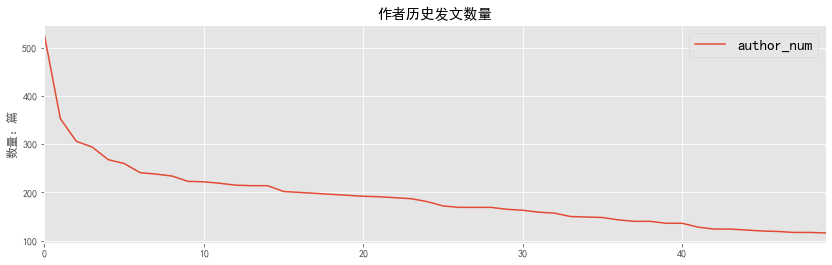

In [3]:
author_top50 = df[['author','author_num']].sort_values(by='author_num',ascending=False).head(50).reset_index()['author_num']
author_top50.plot(kind='line',figsize=(14,4))
plt.title(u'作者历史发文数量')
plt.legend(fontsize=15)
plt.ylabel(u'数量：篇')

#### 2.pandas一些用法

In [4]:
len(df.title.unique())

503

In [5]:
#新增一列data，当title中包含“数据”时，其值等于df.author
df.loc[df['title'].str.contains('数据'),'data'] = df.author

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
#分组后统计某指定列
df.groupby(by='participation')['author'].count()

participation
0.12      8
0.14      7
0.17     12
0.20     15
0.25     92
0.33    195
0.50    244
1.00    286
Name: author, dtype: int64

In [8]:
#只显示data列非空行
df.data.dropna().head()

91      于翔
92     韩昊英
144    钮心毅
145    宋小冬
162    段征宇
Name: data, dtype: object

#### 3.作者空间联系分析

In [9]:
#将相同题目的作者新建列
def authors(x):
    lst = []
    for i in df[df.title == x].author:     
        lst.append(i)
    return lst

In [10]:
df['authors'] = df.title.apply(authors)

In [39]:
#itertools的combinations模块用法
from itertools import combinations
lst = ['a','b','c','d','e']
#map用法：map(func,iter),将序列用func映射
print(list(map(list,combinations(lst,2))))

[['a', 'b'], ['a', 'c'], ['a', 'd'], ['a', 'e'], ['b', 'c'], ['b', 'd'], ['b', 'e'], ['c', 'd'], ['c', 'e'], ['d', 'e']]


In [118]:
#删除重复行drop_duplicates
author_use = df[['title','authors']].drop_duplicates(subset='title').reset_index(drop=True)

In [138]:
#新建列让作者两两组合
author_use['combination'] = author_use.authors.apply(lambda x:list(map(list,combinations(x,2))))

In [139]:
#给空白行赋值为np.nan
author_use['combination'] = author_use.combination.apply(lambda x:np.nan if len(x) == 0 else x)
author_use

,title,authors,combination
0,新型城镇化的关键改革与突破口选择,"[王瑞民, 陶然]","[[王瑞民, 陶然]]"
1,规划教育——从学位教育到职业发展,[叶裕民],NaN
2,我国乡村治理的本原模式研究——以巴林左旗后兴隆地村为例,[郐艳丽],NaN
3,城市群空间集聚和扩散的特征与机制——以长三角城市群、武汉城市群和成渝城市群为例,"[刘涛, 曹广忠, 李凯]","[[刘涛, 曹广忠], [刘涛, 李凯], [曹广忠, 李凯]]"
4,面向存量规划的我国城市公共物品生产模式变革,[于洋],NaN
...,...,...,...
498,大都市圈城市创新网络及其发展特征初探,[李迎成],NaN
499,从差序、离散到融入——“村改居”社区的空间生产研究,[杜培培],NaN
500,新时代街道和社区公共服务设施规划探索——从“服务短缺”到“治理协同”的重庆实践,"[闫晶晶, 王岳]","[[闫晶晶, 王岳]]"
501,芒康县藏族民居的生态适应性特色研究,[王雨枫],NaN


In [141]:
#删除空白行
author_com = author_use.dropna().reset_index(drop=True)
author_com

,title,authors,combination
0,新型城镇化的关键改革与突破口选择,"[王瑞民, 陶然]","[[王瑞民, 陶然]]"
1,城市群空间集聚和扩散的特征与机制——以长三角城市群、武汉城市群和成渝城市群为例,"[刘涛, 曹广忠, 李凯]","[[刘涛, 曹广忠], [刘涛, 李凯], [曹广忠, 李凯]]"
2,外来与本地社区公共服务设施供应的比较研究——基于空间剥夺的视角,"[欧阳伟, 王博祎]","[[欧阳伟, 王博祎]]"
3,控规面对面,"[阳建强, 黄卫东, 李王鸣, 杨晓光, 耿虹, 林隽]","[[阳建强, 黄卫东], [阳建强, 李王鸣], [阳建强, 杨晓光], [阳建强, 耿虹]..."
4,城市天空可视域的测度技术与类型解析,"[马奔, 杨俊宴]","[[马奔, 杨俊宴]]"
...,...,...,...
212,基于生态位理论的国土空间功能重要性评估——以攀西地区为例,"[张继飞, 刘春艳]","[[张继飞, 刘春艳]]"
213,旅游产业、区域经济与城镇化关系研究——基于线性、非线性、面板Granger因果关系检验,"[张毓峰, 马鑫杰, 张炜]","[[张毓峰, 马鑫杰], [张毓峰, 张炜], [马鑫杰, 张炜]]"
214,淘宝村的演变历程与空间优化策略研究——以广州市里仁洞村为例,"[千庆兰, 张嘉欣]","[[千庆兰, 张嘉欣]]"
215,中国城市蔓延的多指标指数测度研究——基于快速城镇化的背景,"[蔡思远, 王家庭, 马洪福]","[[蔡思远, 王家庭], [蔡思远, 马洪福], [王家庭, 马洪福]]"


In [170]:
#建立作者一一对应关系
#利用np.vstack将多个序列纵向相加
a = [1,2,3]
b = list('abc')
c = np.random.randint(1,6,9).reshape(3,3)
d = np.vstack([a,b,c])
d

array([['1', '2', '3'],
       ['a', 'b', 'c'],
       ['4', '2', '3'],
       ['2', '3', '2'],
       ['2', '4', '4']], dtype='<U11')

In [205]:
author_net = pd.DataFrame(np.vstack(author_com.combination),columns=['author1','author2'])
author_net.head()

,author1,author2
0,王瑞民,陶然
1,刘涛,曹广忠
2,刘涛,李凯
3,曹广忠,李凯
4,欧阳伟,王博祎


In [206]:
#对作者前后进行排序，避免漏记
author_net['from'] = pd.DataFrame([author_net['author1'],author_net['author2']]).min()
author_net['to'] = pd.DataFrame([author_net['author1'],author_net['author2']]).max()
author_net['weight'] = 1
author_net

,author1,author2,from,to,weight
0,王瑞民,陶然,王瑞民,陶然,1
1,刘涛,曹广忠,刘涛,曹广忠,1
2,刘涛,李凯,刘涛,李凯,1
3,曹广忠,李凯,曹广忠,李凯,1
4,欧阳伟,王博祎,欧阳伟,王博祎,1
...,...,...,...,...,...
559,千庆兰,张嘉欣,千庆兰,张嘉欣,1
560,蔡思远,王家庭,王家庭,蔡思远,1
561,蔡思远,马洪福,蔡思远,马洪福,1
562,王家庭,马洪福,王家庭,马洪福,1


In [207]:
#统计作者两两合作次数
author_net_sum = author_net.groupby(by=['from','to']).sum().sort_values(by='weight',ascending=False).reset_index()

In [208]:
author_net_sum.head()

,from,to,weight
0,梁颢严,肖荣波,2
1,丁寿颐,刘冠男,1
2,杨永春,王梅梅,1
3,杨晓光,林隽,1
4,杨晓光,耿虹,1


In [211]:
import networkx as nx
%matplotlib inline

In [217]:
#创建关联网络关系
GA = nx.from_pandas_edgelist(author_net_sum.head(100),source='from',target='to',edge_attr='weight')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 140
Number of edges: 100
Average degree:   1.4286


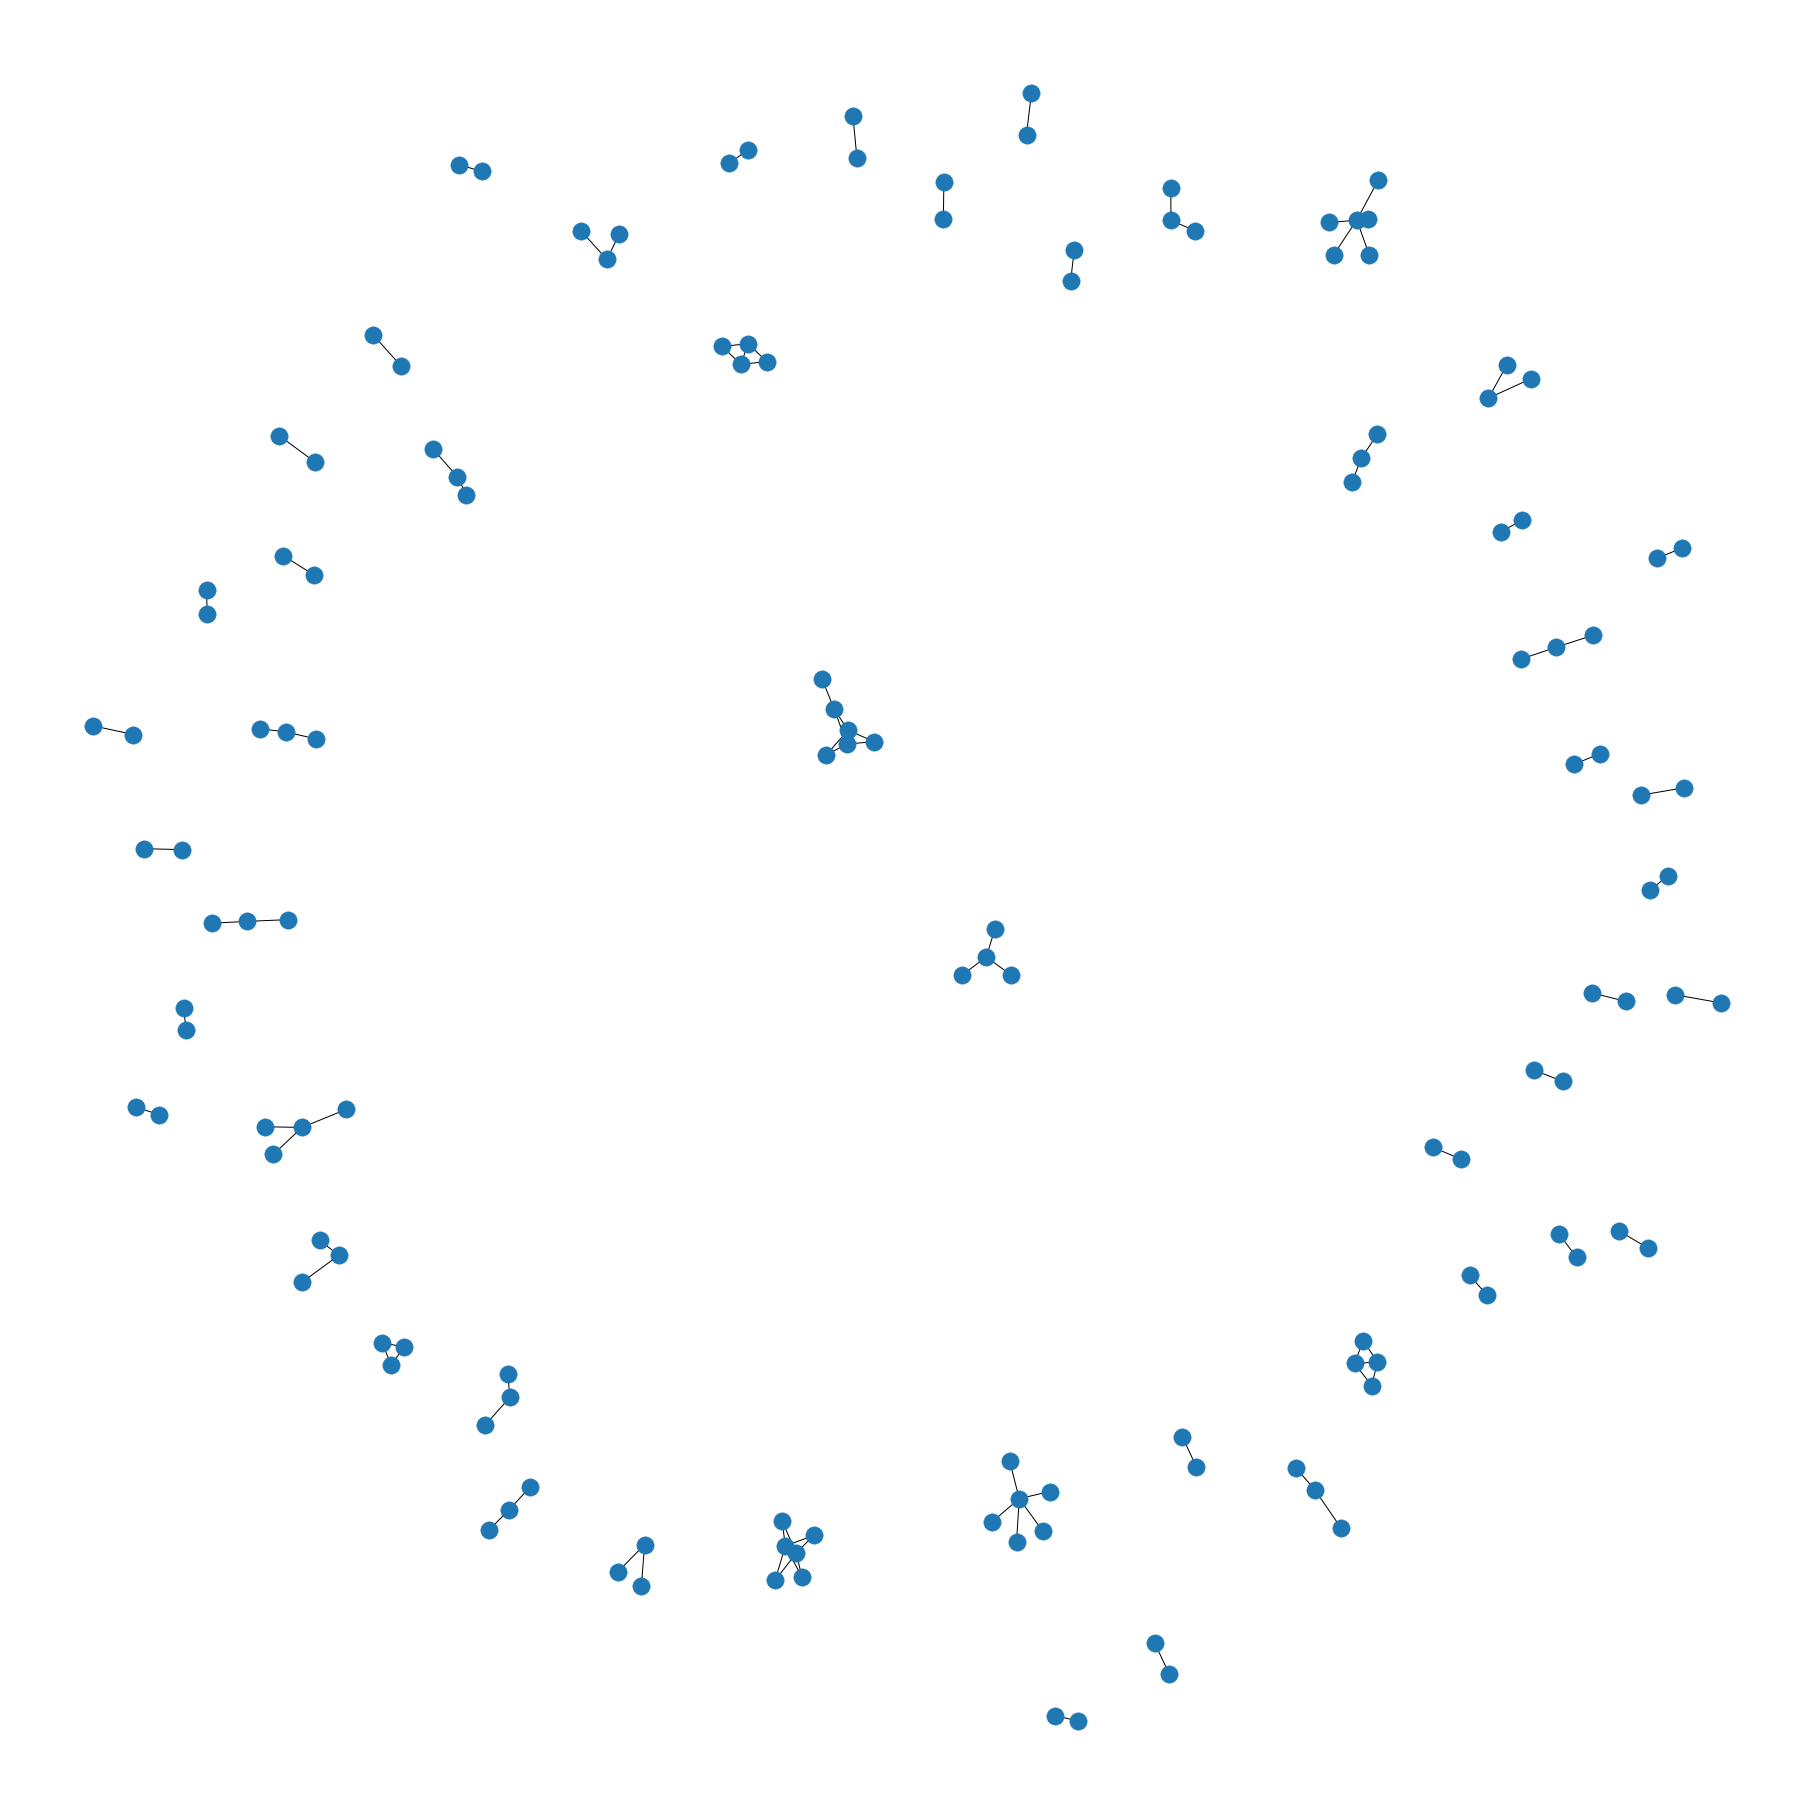

In [219]:
#绘图
plt.figure(figsize=(25,25))
nx.draw(GA)
plt.show()

In [ ]:
#结果优化
